# Проект: вариант 2

###  Задание 1 A/B–тестирование

     1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

     1.2 Входные данные

В качестве входных данных вы имеете 4 csv-файла:

- groups.csv – файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
- groups_add.csv – дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
- active_studs.csv – файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
- checks.csv – файл с информацией об оплатах пользователей в дни проведения эксперимента. 

     1.3 Вопросы

Предлагаем вам ответить на следующие вопросы:

   - На какие метрики вы смотрите в ходе анализа и почему?
   - Имеются ли различия в показателях и с чем они могут быть связаны?
   - Являются ли эти различия статистически значимыми?
   - Стоит ли запускать новую механику на всех пользователей?
   - Данный список вопросов не является обязательным, и вы можете при своём ответе опираться на собственный план.

    1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

### Задание 2. SQL

    2.1 Очень усердные ученики.

    - 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

    - 2.1.2 Задача

Дана таблица peas:

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

    2.2 Оптимизация воронки

    - 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

    - 2.2.2 Задача
    
Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

   - ARPU 
   - ARPAU 
   - CR в покупку 
   - СR активного пользователя в покупку 
   - CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
    
ARPU считается относительно всех пользователей, попавших в группы.
Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.
Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.


### Задание 3. Python

**3.1 Задача**

    Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

    Реализуйте функцию, которая будет строить графики по получаемым метрикам.

## Комментарий:
## Т.к. в задании 1 не указано, когда нужно добавлять groups_add, то принято решение, что основной анализ будет делаться без этого файла, а он будет использован только в функции в задании 3

### Задание 1 A/B–тестирование

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**ДАННЫЕ.**

    groups.csv        – файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B–целевая группа) 
    groups_add.csv    – дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
    active_studs.csv  – файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
    checks.csv        – файл с информацией об оплатах пользователей в дни проведения эксперимента. 

In [454]:
active_studs=pd.read_csv('Проект_2_active_studs.csv')
checks=pd.read_csv('Проект_2_checks.csv',sep=';')
group_add=pd.read_csv('Проект_2_group_add.csv')
groups=pd.read_csv('Проект_2_groups.csv',sep=';')

Проверим, как выглядят наши данные, есть ли нулевые значения и дубликаты и приведём их к единообразию для объединения

In [455]:
group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [456]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [457]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [458]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


Нулевых значений нет

Изменяем наименования колонок для единообразия в checks , для дальнейшего объединения данных

In [459]:
checks=checks.rename(columns={'student_id':'id'})

In [460]:
active_studs=active_studs.rename(columns={'student_id':'id'})

Проверяем на наличие дубликатов student_id в checks

In [461]:
checks.id.duplicated().sum()

0

Проверяем на наличие дубликатов id в groups

In [462]:
groups.id.duplicated().sum()

0

Проверяем на наличие дубликатов id в group_add

In [463]:
group_add.id.duplicated().sum()

0

Проверяем на наличие одинаковых id в groups и  group_add 

In [464]:
duble_groups_group_add = groups.merge(group_add, on='id', how='outer', suffixes=['', 'ADD'], indicator=True)

In [465]:
duble_groups_group_add[duble_groups_group_add['_merge']=='both']

,id,grp,grpADD,_merge


**Дубликатов в данных нет**

Объединяем датафреймы

In [466]:
df_all=groups.merge(active_studs,on='id',how='outer',indicator=True)

Смотрим, какие id есть во фрейме active_studs (пользователи, которые зашли на платформу),  но их нет во фрейме groups
Значит есть пользователи, которые были активными, но не попали ни в одну из групп для анализа.

In [467]:
df_all[df_all['_merge']=='right_only']['id']

74484    5723133
74485    5951797
74486    5730382
74487    5739944
74488    5945085
74489    5700613
74490    5729371
74491    5777081
74492    5740903
74493    5760471
74494    5728431
74495    5723648
74496    5870856
Name: id, dtype: int64

Есть пользователь. который был активным, оплатил , но не вошёл в группы для анализа

In [468]:
checks[checks['id'].isin(df_all[df_all['_merge']=='right_only']['id'])==True]['id']

540    5740903
Name: id, dtype: int64

Объединяем датафрейм с пользователями из эксперимента и активными пользователями, чтобы выявить, есть ли активные пользователи, не входящие в экмперимент

In [469]:
df_users_in_group=groups.merge(active_studs, on='id', how='outer', indicator=True)

создадим датафрейм, где все пользователи, которые есть в группе по тестированию,не зависимо, заходили в систему(active) или нет(no_active)

In [470]:
df_active_users_in_group=df_users_in_group[df_users_in_group['_merge']!='right_only']

Посмотрим пользователей активных, которые есть в группе по эксперименту и заходили в систему

In [471]:
df_active_users_in_group[df_active_users_in_group['_merge']=='both'].shape

(8328, 3)

Переименнуем название колонки _merge в status

In [472]:
df_active_users_in_group=df_active_users_in_group.rename(columns={'_merge':'status'})

Заменим значения в колонке status (left_only':'no_active')('both':'active').
теперь мы видим активных и не активных пользователей в группах

In [473]:
df_active_users_in_group['status']=np.where(df_active_users_in_group['status']=='left_only','no_active','active')

In [474]:
df_active_users_in_group[df_active_users_in_group['status']=='no_active'].shape

(66156, 3)

Добавляем к пользователям, которые учавствуют в эксперименте оплаты

In [475]:
df_active_users_in_group=df_active_users_in_group.merge(checks,on='id',how='left')

Проверим, как ведут себя пользователи в группах(оплатили-не зашли, оплатили-зашли, не оплатили-зашли, не оплатили-не зашли)

In [476]:
df_active_users_in_group[(df_active_users_in_group['status']=='no_active')].shape

(66156, 4)

In [477]:
#(149 пользователей    оплатили и не зашли в систему) Их необходимо убрать из данных, т.к. они не должны были попасть в эксперимент
#(391 пользователь     оплатил и зашёл в систему)
#(7937 пользователя    не оплатили и зашли в систему)
#(66007 пользователя   не оплатили и не зашли в систему)

In [478]:
df_active_users_in_group[(df_active_users_in_group['status']=='no_active')&(df_active_users_in_group['rev'].isna()==False)].shape

(149, 4)

In [479]:
df_active_users_in_group[(df_active_users_in_group['status']=='active')&(df_active_users_in_group['rev'].isna()==True)].shape

(7937, 4)

In [480]:
df_active_users_in_group[(df_active_users_in_group['status']=='active')&(df_active_users_in_group['rev'].isna()==False)].shape

(391, 4)

In [481]:
df_active_users_in_group[(df_active_users_in_group['status']=='no_active')&(df_active_users_in_group['rev'].isna()==True)].shape

(66007, 4)

Оставляем только активных пользователей, т.к. они видели новую механику оплаты

In [482]:
df_active_users_in_group=df_active_users_in_group[df_active_users_in_group['status']=='active']

## Метрики:

- выручка - показывает распределение выручки в каждой группе
- ARPU - сколько пользователь в среднем тратит за определённый период времени. Представляет собой выручку, полученную от клиента за определённый период времени, обычно за месяц 1. Для расчёта метрики берут в учёт всю аудиторию, а не только покупателей)
- ARPPU - средний доход с платящего пользователя, фокусируется исключительно на клиентах, совершивших покупку. Показатель учитывает только тех, кто произвёл покупку или совершил платёж
- cr to pay - коэффициент конверсии в платящих пользователей (CR to Pay или Conversion Rate to Paying Users) — это метрика, которая показывает, какой процент пользователей, взаимодействующих с вашим продуктом или услугой, становится платящими.

Чтобы понять, насколько продуктивна новая механика, необходимо рассчитать ARPPU и ARPU и CR_to_pay


### ARPU

сколько пользователь в среднем тратит за определённый период времени. Представляет собой выручку, полученную от клиента за определённый период времени, обычно за месяц 1. 

In [483]:
arpu_A=df_active_users_in_group[df_active_users_in_group['grp']=='A']['rev'].sum()\
  /len(df_active_users_in_group[df_active_users_in_group['grp']=='A'])

In [484]:
arpu_B=df_active_users_in_group[df_active_users_in_group['grp']=='B']['rev'].sum()\
  /len(df_active_users_in_group[df_active_users_in_group['grp']=='B'])

In [485]:
print(arpu_A,arpu_B)


47.43973941368078 57.86456698071545


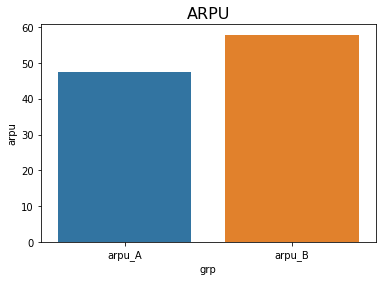

In [486]:
sns.barplot(x='grp', y='arpu', data=pd.DataFrame([['arpu_A',arpu_A],['arpu_B',arpu_B]], columns=['grp', 'arpu']))
plt.title('ARPU', fontsize=16);

### ARPPU

средний доход с платящего пользователя, фокусируется исключительно на клиентах, совершивших покупку.
Показатель учитывает только тех, кто произвёл покупку или совершил платёж 

In [487]:
arppu_A=df_active_users_in_group\
     [(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['rev'].isna()==False)]['rev'].sum()\
  /len(df_active_users_in_group\
     [(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['rev'].isna()==False)])

In [488]:
arppu_B=df_active_users_in_group\
     [(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['rev'].isna()==False)]['rev'].sum()\
  /len(df_active_users_in_group\
     [(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['rev'].isna()==False)])

In [489]:
print(f'arppu_A={arppu_A}, arppu_B={arppu_B}')

arppu_A=933.5897435897435, arppu_B=1255.8274872204472


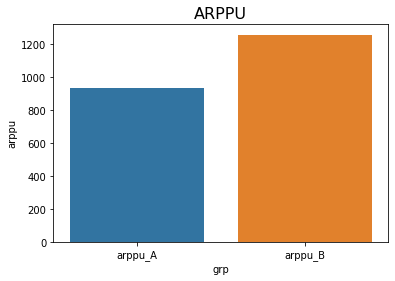

In [490]:
sns.barplot(x='grp', y='arppu', data=pd.DataFrame([['arppu_A',arppu_A],['arppu_B',arppu_B]], columns=['grp', 'arppu']))
plt.title('ARPPU', fontsize=16);

### cr_to_pay

In [491]:
cr_to_pay_A=(len(df_active_users_in_group[(df_active_users_in_group['grp']=='A')&\
                                          (df_active_users_in_group['rev'].isna()==False)])\
             /len(df_active_users_in_group[(df_active_users_in_group['grp']=='A')]))*100

In [492]:
cr_to_pay_B=(len(df_active_users_in_group[(df_active_users_in_group['grp']=='B')&\
                                          (df_active_users_in_group['rev'].isna()==False)])\
             /len(df_active_users_in_group[(df_active_users_in_group['grp']=='B')]))*100

In [493]:
print(cr_to_pay_A,cr_to_pay_B)

5.081433224755701 4.607684380980421


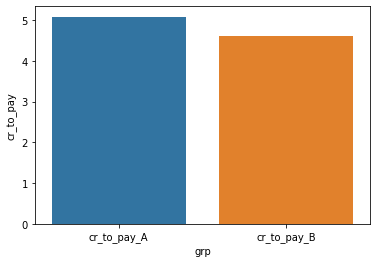

In [494]:
sns.barplot(x='grp', y='cr_to_pay', \
            data=pd.DataFrame([['cr_to_pay_A',cr_to_pay_A],['cr_to_pay_B',cr_to_pay_B]], columns=['grp', 'cr_to_pay']));

**CR to Pay в группе B ниже, чем в группе A**

### Сравним статистику доходов по группам c активными пользователями 

In [495]:
df_active_users_in_group[(df_active_users_in_group['grp']=='A')]['rev'].describe()

count      78.000000
mean      933.589744
std       919.932711
min       199.000000
25%       290.000000
50%       585.000000
75%      1114.750000
max      3660.000000
Name: rev, dtype: float64

In [496]:
df_active_users_in_group[(df_active_users_in_group['grp']=='B')]['rev'].describe()

count     313.000000
mean     1255.827487
std       791.293377
min       199.000000
25%       489.000000
50%      1140.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

**Исходя из анализа статистических показателей активных пользователей, мы видим, что:**
   - в группе B среднее значение доходов Выше, чем в группе А (А_mean=933.58,B_mean=1255.82)
   - в группе B стандартное отклонение меньше, чем в группе А (А_std=919.93,B_std=791.29)
   - анализируя распределение доходов по квартилям мы видим, что в группе B наблюдаются более высокие значения доходов 
    
    

## A/B тестирование
- Вывести boxplot для наглядности распределения доходов
- Проверка на нормальность распределения групп по доходам
- Проверяем гипотезу на то, что в группах нет различий в распределении доходов
- Проверяем гипотезу на то, что нет зависимости между группой и оплатой для активных пользователей (cr_to_pay)
- Проверим статистическую разницу между группами по в метриках ARPU,ARPPU

Создадим два датафрейма с пользователями по группам.
Удалим пропущенные значения в группах и оставим колонку с доходами

In [497]:
group_A = df_active_users_in_group[df_active_users_in_group['grp'] == 'A']['rev'].dropna()
group_B = df_active_users_in_group[df_active_users_in_group['grp'] == 'B']['rev'].dropna()

Проверим данные на нормальность распределения

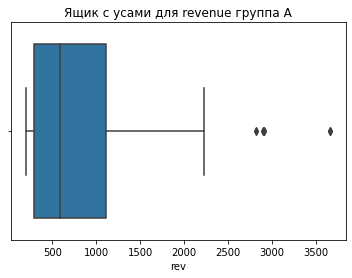

In [498]:
sns.boxplot(x=group_A)
plt.title('Ящик с усами для revenue группа A')
plt.show()

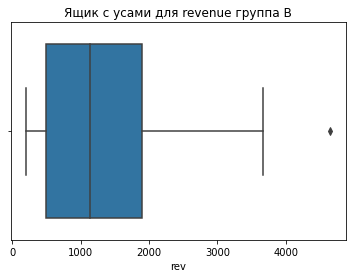

In [499]:
sns.boxplot(x=group_B)
plt.title('Ящик с усами для revenue группа B')
plt.show()

## Проверим на нормальность распределение доходов в группах

**Т.к. значений в выборках у нас много, для большей достоверности полученных данных можно использовать тесты:**

- Д’Агостино и Пирсона
 
- одновыборочный Колмогорова-Смирнова (Для большей достоверности полученных данных объемы рассматриваемых выборок должен быть достаточно большими: n ≥ 50)

Проверим нормальность распределения через тест Д’Агостино и Пирсона

In [500]:
d_statistic, p_value=stats.normaltest(group_B)
if p_value <= 0.05:
    print('Отклоняем H0, данные распределены не нормально')
else:
    print('Не отклоняем H0, данные распределены нормально')

Отклоняем H0, данные распределены не нормально


In [501]:
d_statistic, p_value=stats.normaltest(group_A)
if p_value <= 0.05:
    print('Отклоняем H0, данные распределены ненормально')
else:
    print('Не отклоняем H0, данные распределены нормально')

Отклоняем H0, данные распределены ненормально


Проверим нормальность распределения через одновыборочный тест Колмогорова-Смирнова

In [502]:
d_statistic, p_value = stats.kstest(group_A, 'norm', args=(np.mean(group_A), np.std(group_A)))

print(f"Статистика теста: {d_statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05  # уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные распределены ненормально.")
else:
    print("Не отвергаем нулевую гипотезу: данные распределены нормально.")

Статистика теста: 0.22045934591129768
P-значение: 0.0008253553713573273
Отвергаем нулевую гипотезу: данные распределены ненормально.


In [503]:
d_statistic, p_value = stats.kstest(group_B, 'norm', args=(np.mean(group_B), np.std(group_B)))

print(f"Статистика теста: {d_statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05  # уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: данные распределены ненормально.")
else:
    print("Не отвергаем нулевую гипотезу: данные распределены нормально.")

Статистика теста: 0.255831089729082
P-значение: 1.5019596338138588e-18
Отвергаем нулевую гипотезу: данные распределены ненормально.


Посмотрим распределение доходов по группам 

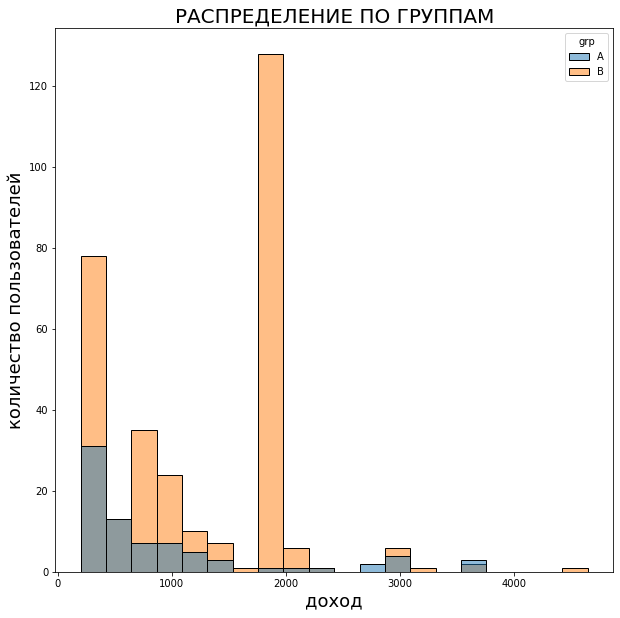

In [504]:
fig, axes=plt.subplots(figsize=(10,10))
sns.histplot(data=df_active_users_in_group[df_active_users_in_group['status']=='active'],x='rev',hue='grp',bins=20)
plt.title("РАСПРЕДЕЛЕНИЕ ПО ГРУППАМ",fontsize=20)
plt.xlabel("доход",fontsize=18)
plt.ylabel("количество пользователей",fontsize=18);

**Выведем отдельно гистограммы по распределению доходов в группах**

Группа B

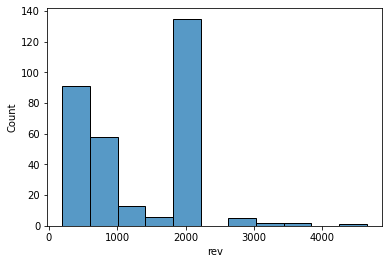

In [505]:
sns.histplot(group_B);

Группа A

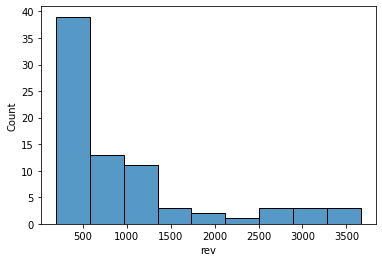

In [506]:
sns.histplot(group_A);

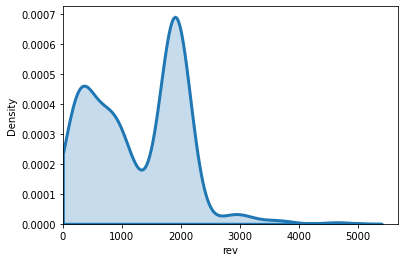

In [507]:
sns.kdeplot(group_B,fill=True,linewidth=3,clip=(0, None))
plt.xlim(0, None)
plt.show()


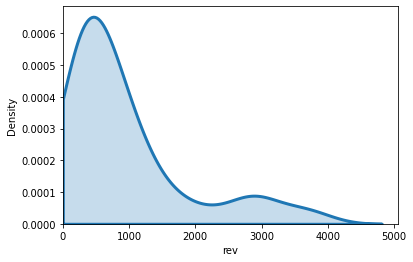

In [508]:
sns.kdeplot(group_A,fill=True,linewidth=3,clip=(0, None))
plt.xlim(0, None)
plt.show()


# Доходы в группах A и B распределены не нормально

## Проверяем гипотезу на то, что в группах  доходы распределены не одинакого 

### Сравнение доходов через тест Колмогорова-Смирнова (Проверим, отличаются ли распределения двух выборок)

In [509]:
ks_statistic, p_value = stats.ks_2samp(group_A, group_B)

# Вывод результатов
print(f"Статистика КС: {ks_statistic}")
print(f"P-значение: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Можно отклонить нулевую гипотезу — между группами скорее всего есть статистически значимая разница.")
else:
    print("Нет оснований отклонять нулевую гипотезу — между группами скорее всего нет статистически значимой разницы.")

Статистика КС: 0.322233144916851
P-значение: 2.674108057654223e-06
Можно отклонить нулевую гипотезу — между группами скорее всего есть статистически значимая разница.


### Мы получаем, что скорее всего есть статистически значимая разница в распределении доходов между группами

In [511]:
# Проверка равенства дисперсий с помощью теста Левене
levene_test = stats.levene(df_active_users_in_group[(df_active_users_in_group['grp']=='A')& (df_active_users_in_group['rev'].isna()==False)]['rev']\
                           ,df_active_users_in_group[(df_active_users_in_group['grp']=='B')& (df_active_users_in_group['rev'].isna()==False)]['rev'])
print('Тест Левене: статистика = {:.4f}, p-value = {:.4f}'.format(levene_test.statistic, levene_test.pvalue))

# Интерпретация результата
alpha = 0.05
if levene_test.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")
else:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")

Тест Левене: статистика = 3.0559, p-value = 0.0812
Не отвергаем нулевую гипотезу: дисперсии равны


**Поскольку тест Колмогорова-Смирнова указывает на различие в распределениях, это может означать, что, хотя дисперсии равны, одна из выборок может иметь другое среднее значение или другую форму распределения (например, скошенность или наличие выбросов).**

## Проверяем гипотезу на то, что нет зависимости между группой и оплатой для активных пользователей, т.е. сравниваем CR_to_pay


Хи-квадрат тест (Chi-squared test):

- Применяется для сравнения двух категориальных переменных.
- Проверяет, существует ли статистически значимая зависимость между группой и оплатой.
- Предполагает большой объём выборки.

In [512]:
df_active_users_in_group['pay']=np.where(df_active_users_in_group['rev'].isna()==True,0,1)

In [513]:
contingency_table_pay=pd.crosstab(df_active_users_in_group['grp'], df_active_users_in_group['pay'])

In [514]:
contingency_table_pay

pay,0,1
grp,,
A,1457,78
B,6480,313


- Нулевая гипотеза (H0): Нет различий в конверсии покупок между тестовой и контрольной группами.

- Альтернативная гипотеза (H1): Существует разница в конверсии покупок между тестовой и контрольной группами.

In [515]:
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table_pay)

print(f"Хи-квадрат статистика: {chi2_statistic}")
print(f"P-значение: {p_value}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые частоты: {expected}")

# Интерпретация результата
alpha = 0.05  # уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: разница вряд ли объясняется случайностью. То есть, скорее всего, разница действительно существует.")
else:
    print("Не отвергаем нулевую гипотезу: То есть, скорее всего, разницы не существует.")

Хи-квадрат статистика: 0.526607176998989
P-значение: 0.46803677583199144
Степени свободы: 1
Ожидаемые частоты: [[1462.93167627   72.06832373]
 [6474.06832373  318.93167627]]
Не отвергаем нулевую гипотезу: То есть, скорее всего, разницы не существует.


### Не отвергаем нулевую гипотезу: То есть, скорее всего, разницы не существует в группах по метрике CR_to_pay

## ARPU - средний доход с клиента

    Нулевая гипотеза (H0): Нет разницы в показателе ARPU между тестовой и контрольной группой.
    Альтернативная гипотеза (H1): Есть разница в значении ARPU между тестовой и контрольной группой.

Наблюдаемая разница ARPU: -10.4248
p-value: 0.7147
Различия в ARPU между группами не статистически значимы.


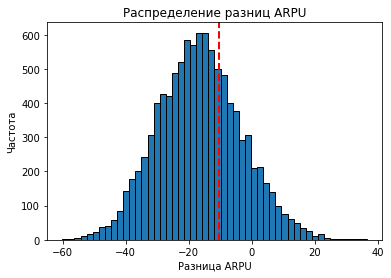

In [516]:
# Функция для бутстрап-выборки
def calculate_arpu(group):
    return group['rev'].sum() / group['id'].nunique()

# Наблюдаемая разница ARPU
group_A = df_active_users_in_group.query('grp == "A"')
group_B = df_active_users_in_group.query('grp == "B"')
observed_diff = calculate_arpu(group_A) - calculate_arpu(group_B)

# Бутстрап-тест
n_iterations = 10000
bootstrap_diffs = np.zeros(n_iterations)

# Генерация бутстрап-выборок и расчет разницы ARPU
np.random.seed(42)  # Для воспроизводимости результатов
for i in range(n_iterations):
    bootstrap_A = group_A.sample(n=len(group_A), replace=True, random_state=i)
    bootstrap_B = group_B.sample(n=len(group_B), replace=True, random_state=i)

    bootstrap_diffs[i] = calculate_arpu(bootstrap_A) - calculate_arpu(bootstrap_B)

# Оценка p-value
p_value = np.mean(np.abs(bootstrap_diffs) >= np.abs(observed_diff))

# Вывод результатов
print(f"Наблюдаемая разница ARPU: {observed_diff:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Различия в ARPU между группами статистически значимы.")
else:
    print("Различия в ARPU между группами не статистически значимы.")

# Визуализация распределения разностей ARPU
plt.hist(bootstrap_diffs, bins=50, edgecolor='k')
plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=2)
plt.title('Распределение разниц ARPU')
plt.xlabel('Разница ARPU')
plt.ylabel('Частота')
plt.show()

## ARPPU - средний доход с платящего клиента

    Нулевая гипотеза (H0): Нет разницы в показателе ARPPU между тестовой и контрольной группой.
    Альтернативная гипотеза (H1): Есть разница в значении ARPPU между тестовой и контрольной группой.

Наблюдаемая разница ARPPU: -322.2377
p-value: 0.8285
Различия в ARPPU между группами не статистически значимы.


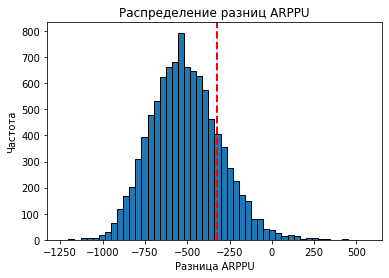

In [517]:
# Функция для бутстрап-выборки
def calculate_arppu(group):
    return group['rev'].sum() / group['id'].nunique()

# Наблюдаемая разница ARPU
group_A = df_active_users_in_group\
     [(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['rev'].isna()==False)]
group_B = df_active_users_in_group\
     [(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['rev'].isna()==False)]

observed_diff = calculate_arppu(group_A) - calculate_arppu(group_B)

# Бутстрап-тест
n_iterations = 10000
bootstrap_diffs = np.zeros(n_iterations)

# Генерация бутстрап-выборок и расчет разницы ARPU
np.random.seed(42)  # Для воспроизводимости результатов
for i in range(n_iterations):
    bootstrap_A = group_A.sample(n=len(group_A), replace=True, random_state=i)
    bootstrap_B = group_B.sample(n=len(group_B), replace=True, random_state=i)

    bootstrap_diffs[i] = calculate_arppu(bootstrap_A) - calculate_arppu(bootstrap_B)

# Оценка p-value
p_value = np.mean(np.abs(bootstrap_diffs) >= np.abs(observed_diff))

# Вывод результатов
print(f"Наблюдаемая разница ARPPU: {observed_diff:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Различия в ARPPU между группами статистически значимы.")
else:
    print("Различия в ARPPU между группами не статистически значимы.")

# Визуализация распределения разностей ARPU
plt.hist(bootstrap_diffs, bins=50, edgecolor='k')
plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=2)
plt.title('Распределение разниц ARPPU')
plt.xlabel('Разница ARPPU')
plt.ylabel('Частота')
plt.show()

## Выведем метрики перед подведением итогов

In [518]:
print('Отношение количества активных/не активных пользователей:')
print(f'А= {percent_active_a}, B= {percent_active_b}')
print('')
print("ARPU")
print(f'ARPU_A= {arpu_A}, ARPU_B= {arpu_B}')
print('')
print("ARPPU")
print(f'ARPPU_A= {arppu_A}, ARPPU_B= {arppu_B}')
print('')
print('CR')
print('cr_to_pay')
print(f'cr_to_pay_A= {cr_to_pay_A}, cr_to_pay_B= {cr_to_pay_B}')
print('')

print('Описательная Статистика группы А по доходам')
print(df_active_users_in_group[(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['status']=='active')]['rev'].\
                                                                                                                describe())
print('')
print('Описательная Статистика группы B по доходам')
print(df_active_users_in_group[(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['status']=='active')]['rev'].\
                                                                                                                describe())

Отношение количества активных/не активных пользователей:
А= 10.462817803830687, B= 11.357062845869628

ARPU
ARPU_A= 47.43973941368078, ARPU_B= 57.86456698071545

ARPPU
ARPPU_A= 933.5897435897435, ARPPU_B= 1255.8274872204472

CR
cr_to_pay
cr_to_pay_A= 5.081433224755701, cr_to_pay_B= 4.607684380980421

Описательная Статистика группы А по доходам
count      78.000000
mean      933.589744
std       919.932711
min       199.000000
25%       290.000000
50%       585.000000
75%      1114.750000
max      3660.000000
Name: rev, dtype: float64

Описательная Статистика группы B по доходам
count     313.000000
mean     1255.827487
std       791.293377
min       199.000000
25%       489.000000
50%      1140.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64


## ВЫВОДЫ:

    1.ARPU у группы B выше, однако статстически значимой разницы тест bootstrap не показал
    2.ARPPU у группы B выше, однако статстически значимой разницы тест bootstrap не показал
    4.CR
        4.1 cr_to_pay -Конверсия пользователей в платящих так же у группы "B" меньше, однако статистический тест показывает,что новая система оплаты услуг не оказала значительного влияния на снижение конверсии при оплате. 
    5.Статистически значимая разница в распределении доходов между группами есть, однако дисперсии скорее всего равны.
    6.Исходя из анализа статистических показателей активных пользователей, мы видим, что:
        6.1 В группе B среднее значение доходов Выше, чем в группе А (А_mean=933.58,B_mean=1255.82)
        6.2 В группе B стандартное отклонение в доходах меньше, чем в группе А (А_std=919.93,B_std=791.29)
        6.3 Анализируя распределение доходов по квартилям мы видим, что в группе B более высокие значения доходов по квартилям
        
## ИТОГ:

**Внедрение новой системы оплаты необходимо отложить, т.к.:
1. Метрики CR_to_pay, ARPU и ARPPU не показали статистически значимых различий
2. В данных явно есть баги, а именно :
    - 2.1 149 пользователей попали в эксперимент,оплатили но не были активными, а значит не должны были попасть в данные
    - 2.2 Различие в распределении доходов, а именно перекос в количестве оплат в районе 2000у.е. в группе B.
    
Предложение: Проврить, корректно ли сгенерированы выборки для тестирования и провести эксперимент снова.

**3.1 ЗАДАЧА.**

   - Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
   - Реализуйте функцию, которая будет строить графики по получаемым метрикам.

Присвоим переменной path_add_df путь к файлу с дополнительными данными

In [521]:
path_add_df='Проект_2_group_add.csv'

Напишем функцию, которая выявит несоответствие в наименованиях заголовков колонок и переименнует их 
в соответствии со стандартом. Т.к. мы не знаем, как будут наименоваться колонки, но знаем, что они должны содержать, то проверка происходит по содержимому и в соответствии с содержимым назначается новое наименование.

In [522]:
def rename_columns(add_df):
    group=['A','B']
    x={}
    for i in add_df.columns:
        #проверяем, что в колонке только 2 значения и колонка называется не grp
        if len(add_df[i].unique())==2 and i!='grp':
            #Проверяем, соответствуют ли уникальные значения тем, что в эталонном списке group
            if list(add_df[i].unique())[0] in group and list(add_df[i].unique())[1] in group:
                x[i]='grp'
        if add_df[i].dtype==int and i!='id':
            x[i]='id'
    #Переименовываем колонки в соответствии с выявленными несоответствиями
    add_df.rename(columns=x,inplace=True)
    return add_df     

### функция которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

Напишем функцию, которая будет:
1. загружать новые данные
2. проверять их на соответствие количества колонок 
3. запускать функцию для переименования колонок
4. пересчитывать и возвращать метрики

In [526]:
def load_and_update_df(groups,path_add_df):
    add_df=pd.read_csv(path_add_df)
    try:
        if add_df.shape[1]!=2:
            raise ValueError(f"Ошибка: количество колонок должно быть 2, а их {add_df.shape[1]}.")
    except ValueError as e:
            print(e)  # Выводим сообщение об ошибке
            sys.exit(1)
    else:    
            rename_columns(add_df) 
            groups=pd.concat([groups,add_df])                 
            groups=groups.drop_duplicates(subset='id')
            df_users_in_group=groups.merge(active_studs, on='id', how='outer', indicator=True)
            df_active_users_in_group=df_users_in_group[df_users_in_group['_merge']!='right_only']
            df_active_users_in_group=df_active_users_in_group.rename(columns={'_merge':'status'})
            df_active_users_in_group['status']=np.where(df_active_users_in_group['status']=='left_only','no_active','active')
            df_active_users_in_group=df_active_users_in_group.merge(checks,on='id',how='left')
            df_active_users_in_group=df_active_users_in_group[df_active_users_in_group['status']=='active']
            # Метрики:           
            #ARPU
            #ARPPU
            #cr в оплату
           

            arpu_A=df_active_users_in_group[df_active_users_in_group['grp']=='A']['rev'].sum()\
          /len(df_active_users_in_group[df_active_users_in_group['grp']=='A'])
            arpu_B=df_active_users_in_group[df_active_users_in_group['grp']=='B']['rev'].sum()\
          /len(df_active_users_in_group[df_active_users_in_group['grp']=='B'])


            arppu_A=df_active_users_in_group[(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['rev'].isna()==False)]['rev'].sum()\
          /len(df_active_users_in_group[(df_active_users_in_group['grp']=='A')&(df_active_users_in_group['rev'].isna()==False)])
            arppu_B=df_active_users_in_group[(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['rev'].isna()==False)]['rev'].sum()\
          /len(df_active_users_in_group[(df_active_users_in_group['grp']=='B')&(df_active_users_in_group['rev'].isna()==False)])

           
            cr_to_pay_A=(len(df_active_users_in_group[(df_active_users_in_group['grp']=='A')&\
                                          (df_active_users_in_group['rev'].isna()==False)])\
             /len(df_active_users_in_group[(df_active_users_in_group['grp']=='A')]))*100
            
            cr_to_pay_B==(len(df_active_users_in_group[(df_active_users_in_group['grp']=='B')&\
                                          (df_active_users_in_group['rev'].isna()==False)])\
             /len(df_active_users_in_group[(df_active_users_in_group['grp']=='B')]))*100
          
           
            describe_A=df_active_users_in_group[df_active_users_in_group['grp']=='A']['rev'].\
            describe().to_frame()
            describe_B=df_active_users_in_group[df_active_users_in_group['grp']=='B']['rev'].\
            describe().to_frame()
            return  arpu_A,arpu_B,arppu_A,arppu_B,cr_to_pay_A,cr_to_pay_B,describe_A,describe_B,df_active_users_in_group

### Напишем функцию, которая будет присваивать метрикам соответствующие значения из функции по пересчёту метрик и выводить их в print

In [527]:
def new_metrics(groups,path_add_df):
    #ARPU
    #ARPPU
    #ARPAU
    #cr в оплату
    #cr в активных
    #cr активных в оплату
    #describe
    
    arpu_A,arpu_B,arppu_A,arppu_B,cr_to_pay_A,cr_to_pay_B,describe_A,describe_B,df_active_users_in_group=\
                    load_and_update_df(groups,path_add_df)
    print('')
    print("ARPU")
    print(f'ARPU_A= {arpu_A}, ARPU_B= {arpu_B}')
    print('')
    print("ARPPU")
    print(f'arppu_A= {arppu_A}, arppu_B= {arppu_B}')
    print('')
    print('CR')
    print('cr_to_pay')
    print(f'cr_to_pay_A= {cr_to_pay_A}, cr_to_pay_B= {cr_to_pay_B}')
    print('')
    print('Описательная Статистика group_A по доходам')
    print(describe_A)
    print('')
    print('Описательная Статистика group_B по доходам')
    print(describe_B)

In [528]:
new_metrics(groups,path_add_df)


ARPU
ARPU_A= 47.34720416124838, ARPU_B= 58.058798103777754

ARPPU
arppu_A= 933.5897435897435, arppu_B= 1257.8789920382164

CR
cr_to_pay
cr_to_pay_A= 5.071521456436931, cr_to_pay_B= 4.607684380980421

Описательная Статистика group_A по доходам
               rev
count    78.000000
mean    933.589744
std     919.932711
min     199.000000
25%     290.000000
50%     585.000000
75%    1114.750000
max    3660.000000

Описательная Статистика group_B по доходам
               rev
count   314.000000
mean   1257.878992
std     790.864254
min     199.000000
25%     511.750000
50%    1140.000000
75%    1900.000000
max    4650.000000


### Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [544]:
def new_grafics(groups,path_add_df):
    arpu_A,arpu_B,arppu_A,arppu_B,cr_to_pay_A,cr_to_pay_B,describe_A,describe_B,df_active_users_in_group=load_and_update_df(groups,path_add_df)
    
   
    fig, axes = plt.subplots(1,2, figsize=(10, 4))
    sns.barplot(x='grp', y='arpu', data=pd.DataFrame([['arpu_A',arpu_A],['arpu_B',arpu_B]], columns=['grp', 'arpu']),ax=axes[0])
    axes[0].set_title('ARPU', fontsize=16)
    sns.barplot(x='grp', y='arppu', data=pd.DataFrame([['arppu_A',arppu_A],['arppu_B',arppu_B]], columns=['grp', 'arppu']),ax=axes[1])
    axes[1].set_title('ARPPU', fontsize=16)

    fig, axes = plt.subplots(figsize=(10, 4))
    sns.barplot(x='grp', y='cr_pay', data=pd.DataFrame([['cr_pay_A',cr_to_pay_A],['cr_pay_B',cr_to_pay_B]], columns=['grp', 'cr_pay']))
    plt.title('cr_pay', fontsize=16)


    group_A = df_active_users_in_group[df_active_users_in_group['grp'] == 'A']['rev'].dropna()
    group_B = df_active_users_in_group[df_active_users_in_group['grp'] == 'B']['rev'].dropna()

    fig, axes = plt.subplots(1,2, figsize=(10, 4))
    sns.histplot(group_A,ax=axes[0])
    axes[0].set_title('REVENUE', fontsize=16)
    sns.histplot(group_B,ax=axes[1])
    axes[1].set_title('REVENUE', fontsize=16);

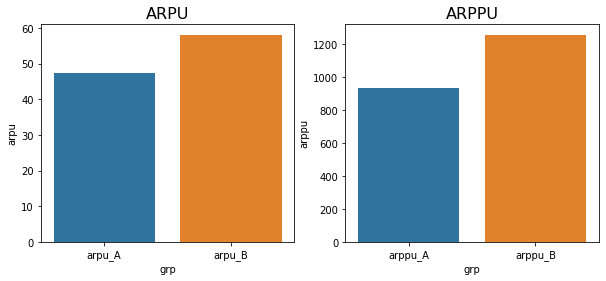

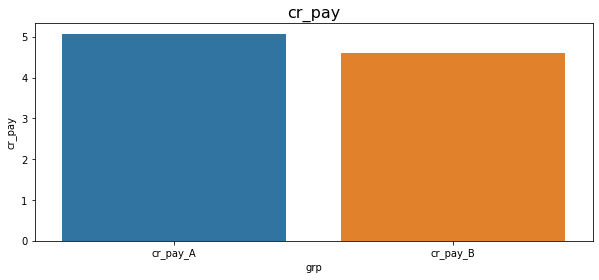

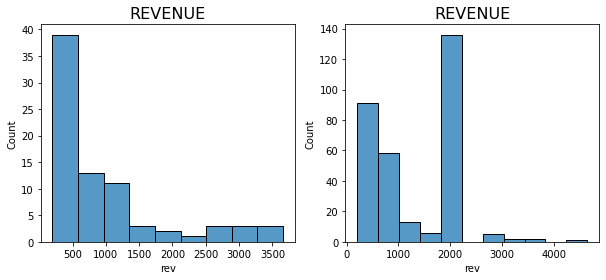

In [545]:
new_grafics(groups,path_add_df)

# Задание 2. SQL

### 2.1.2 Задача
Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

### 1 задание (если бы в таблице период был бы несколько месяцев)

select count(distinct(a.st_id)) as count_student_correct_20
From (SELECT EXTRACT(year FROM timest) AS Год,
       EXTRACT(month FROM timest) AS Месяц,
       st_id,count(correct) as count_correct 
from peas
where correct=true
group by 1,2,3
having count(correct)>=20) as a

### или (т.к. в данных период 1 месяц)

Select count(distinct(a.st_id))
from (SELECT st_id,count(correct)
from peas
where correct=True
group by st_id
having count(correct)>=20
order by st_id) as a


### 2.2.2 Задача

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

   - ARPU 

   - ARPAU 

   - CR в покупку

   - СR активного пользователя в покупку 

   - CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

with active as (select peas.st_id
from peas
where peas.correct=true
group by peas.st_id
having count(correct)>10)



Select arpu.test_grp,arpu.count_all,arpu.arpu,arpau.arpau,arpau.count_pay_active::float/arpu.count_all*100 as cr_pay,arpau.count_pay_active::float/arpau.count_active_users*100 as cr_active_pay,
math.CR_math as cr_math
from(
Select studs.test_grp,count(distinct(studs.st_id)) as count_all,sum(final_project_check.money) as sum_all,sum(final_project_check.money)/count(distinct(studs.st_id)) as arpu
from studs
left join final_project_check on final_project_check.st_id=studs.st_id
group by studs.test_grp) as arpu

join 
(select t1.test_grp,t2.count_pay_active,t1.count_active_users,t1.sum_active,t1.ARPAU
from(
select studs.test_grp,count(distinct(active.st_id)) as count_active_users,sum(final_project_check.money) as sum_active,sum(final_project_check.money)::float/count(distinct(active.st_id)) as ARPAU
from studs
left join final_project_check on final_project_check.st_id=studs.st_id
right join active on active.st_id=studs.st_id
group by studs.test_grp) as t1
join (select studs.test_grp,count(distinct(studs.st_id)) as count_pay_active
from studs
left join final_project_check on final_project_check.st_id=studs.st_id
right join active on active.st_id=studs.st_id 
where final_project_check.money is not null
group by studs.test_grp) as t2 on t2.test_grp=t1.test_grp) as arpau on arpau.test_grp=arpu.test_grp

join
(Select studs.test_grp,count(distinct(math.st_id)) as count_math,count(sum_math) as count_math_pay,count(sum_math)::float/count(distinct(math.st_id))*100 as CR_math
from (select peas.st_id,count(correct),sum(final_project_check.money) as sum_math
from peas
left join final_project_check on final_project_check.st_id=peas.st_id
where peas.correct=true and peas.subject='Math'
group by peas.st_id
having count(correct)>=2) as math
left join studs on studs.st_id=math.st_id
group by studs.test_grp) as math on math.test_grp=arpu.test_grp
